In [8]:
import tomotopy as tp
import spacy
from spacy.tokens import DocBin, Doc
import pandas as pd 
from tqdm import tqdm
import numpy as np
import pandas as pd

## Apply NLP pipeline for tokenization, lemmatization and other features for latter uses

In [ ]:
doc_bin = DocBin(store_user_data=True)
Doc.set_extension("ID", default=None)
nlp = spacy.load('fr_core_news_lg', exclude=["ner"])
texts = (text, ID for ID, text for textDf.content.iteritems())
for doc, ID in nlp.pipe(texts,as_tuples = True, batch_size=512,n_process=24):
    doc._.ID = ID
    doc_bin.add(doc)
    
doc_bin.to_disk("data/le_figaro.spacy")
    

# Pachinko allocation

In [ ]:
nlp = spacy.load('fr_core_news_lg', disable=["ner"])

Doc.set_extension("ID", default=None)
doc_bin = DocBin(store_user_data=True).from_disk("./data.spacy")

In [ ]:
def preprocess_text(doc):
    ID = doc._.ID
    doc = [doc.lemma_.lower() for word in doc 
           if word.is_alpha and (not word.is_stop) and (len(word.lemma_)>2) and (not word.is_oov)] 
    return ID, text

In [ ]:
docs = ((ID,preprocess_text(doc)) for ID, doc 
        in tqdm(doc_bin.get_docs(nlp.vocab)))
textDf = pd.DataFrame(docs, columns=['index','lemmatized'])


In [128]:
a = 2
(a*6)*5

60

In [ ]:
bigram = Phrases(raw_articles, min_count=10, threshold=10)
bigram_mod = Phraser(bigram)
raw_articles = list(bigram_mod[raw_articles])
trigram = Phrases(raw_articles, min_count=10, threshold=15)
trigram_mod = Phraser(bigram)
raw_articles = list(trigram_mod[raw_articles])
textDf["nGram"] = raw_articles
textDf["nGram"] = textDf["nGram"].apply(' '.join)
textDf["lemmatize"] = textDf["lemmatize"].apply(' '.join)
textDf.to_csv('data/le_figaro_lemmatized_without_stop.csv',index=False)

In [ ]:
textDf = pd.read_csv('data/le_figaro_lemmatized_without_stop.csv')
raw_articles = textDf.nGram.str.split().to_list()

In [ ]:
corpus = tp.utils.Corpus()
for doc in raw_articles:
    if doc:
        corpus.add_doc(doc)

In [ ]:
k1_max = 8 
k2_max = 20
k2_min = 5
params = []
scores = []
num_iter = 0
max_iter = 0
for k1 in range(1, k1_max):
    for k2 in range(max(k1,k2_min),k2_max):
        max_iter +=1
        
start = time.time()
for k1 in range(1, k1_max):
    for k2 in range(max(k1,k2_min),k2_max):
        num_iter+=1
        model = tp.PAModel(tw=tp.TermWeight.IDF, min_df=10, rm_top=25, k1=k1, k2=k2, corpus=corpus)
        model.burn_in = 15
        model.train(40, workers=24)
        score = tp.coherence.Coherence(model, coherence="c_v").get_score()
        params.append((k1,k2))
        scores.append(score)
        print("Runtime: %.2f seconds" %(time.time() - start), "|| Number of Searches: %s out of  %s" %(num_iter, max_iter), "|| k1: %s & k2: %s || coherence : %.3f" %(k1,k2,score))

best_params = np.argmax(scores)
print("(BEST MODEL) k1=%s k2=%s coherence=%.2f"  %(params[best_params][0], params[best_params][1],  scores[best_params]))

# BERTopic

In [117]:
textDf = pd.read_csv('data/le_figaro.csv')

In [118]:
textDf

,content,date,OCR confidence,page,raw_article,nGram
0,"La Roche, octobre. Tandis que Silène, escorté ...",1900-10-21,0.554515,0,La Roche . octobre . Tandis que Silène . e...,La_Roche . octobre . Tandis_que Silène . escor...
1,La Température Malgré la hausse relative du ba...,1900-10-21,0.554515,0,La Température Malgré la hausse relative du b...,La_Température Malgré la hausse relative du ba...
2,ENTRE DEUX IMPOPULARITES Le-nouveau Conseil mu...,1900-10-21,0.554515,0,ENTRE DEUX IMPOPULARITES Le-nouveau Conseil m...,ENTRE_DEUX IMPOPULARITES Le-nouveau Conseil_mu...
3,Nous sommes encore à une quinzaine de jours de...,1900-10-21,0.554515,0,Nous sommes encore à une quinzaine de jours d...,Nous_sommes encore à une_quinzaine de jours de...
4,"Deux anciens gardes des sceaux vont, cette ann...",1900-10-21,0.554515,0,Deux anciens gardes des sceaux vont . cette ...,Deux anciens gardes des_sceaux vont . cette_an...
...,...,...,...,...,...,...
624512,les mécaniciens des chemins de fer Grenotle. P...,1907-05-27,0.574735,3,les mécaniciens des chemins de fer Grenotle ....,les mécaniciens des chemins de fer Grenotle . ...
624513,"un espion , Belfort. L'individu-arrêté sôus l'...",1907-05-27,0.574735,3,un espion . Belfort . L'individu-arrêté sô...,un_espion . Belfort . L'individu-arrêté sôus_l...
624514,"Quatrième couccrt historique, de musique russe...",1907-05-27,0.574735,3,Quatrième couccrt historique . de musique ru...,Quatrième couccrt historique . de musique russ...
624515,"plaine, comme sur la mer, même quand le soleil...",1907-05-27,0.574735,3,plaine . comme sur la mer . même quand le s...,plaine . comme sur la mer . même quand le sole...


In [119]:
test = textDf.content.str.split()

<AxesSubplot:ylabel='Frequency'>

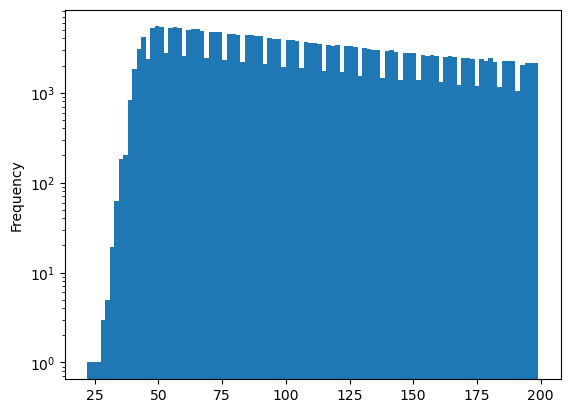

In [133]:
test.apply(len)[test.apply(len)<200].plot.hist(logy = True,bins=100)

In [138]:
textDf['avgLen'] = test.apply(lambda x: np.mean([len(w) for w in x]))
textDf['ratio'] = test.apply(lambda x: np.mean([len(w)>2 for w in x]))


<AxesSubplot:ylabel='Frequency'>

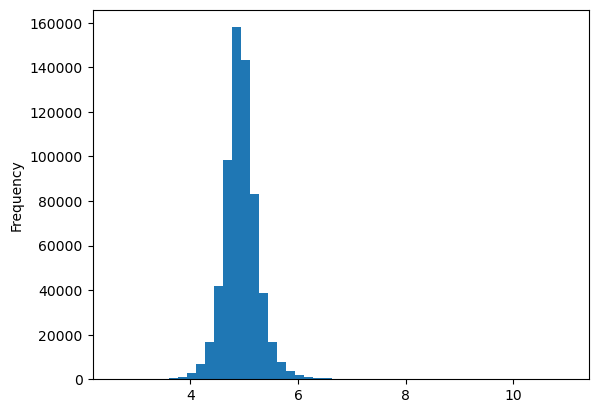

In [139]:
textDf['avgLen'].plot.hist(bins=50)


<AxesSubplot:ylabel='Frequency'>

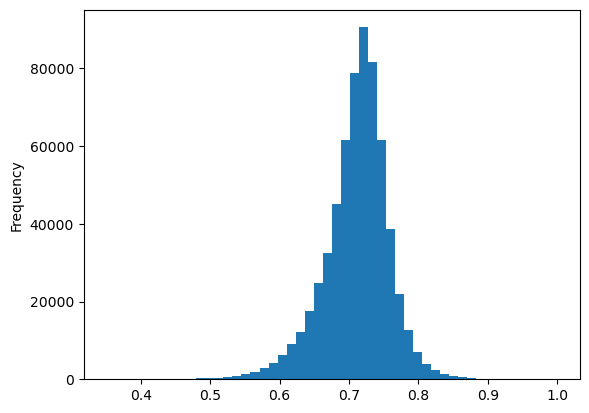

In [140]:
textDf['ratio'].plot.hist(bins=50)


In [224]:
import os, json
import pandas as pd
import json 
import plotly.express as px
from IPython.display import Image
import re
import gc
import string
import time
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases
from gensim.models.callbacks import CallbackAny2Vec
from polyleven import levenshtein
import spacy

import pickle

class Corrector():
    
    def __init__(self,model=False,corLexique=None,errLexique=None):
        self.model = model
        if  corLexique and errLexique:
            self.corLexique = corLexique
            self.errLexique = errLexique
            self.typosPair = {}
            self.segmentationsPair = {}
            self.fusionsPair = {}
        else:
            self.loadData()
        
        self.typoRatio = 15
        self.segRatio = 15
        self.lineBreakPattern = re.compile('[^a-zA-ZÀ-ÿ]?\-[^a-zA-ZÀ-ÿ]?')
        self.toSegmentAgain = None
        
    
    
    def makeCorrectionPair(self, word, wordFreq):
        typos = []
        segmentations = []
        fusions = []
        wordLen = len(word)
        errWordFreq = self.errLexique.get(word,False) # for fusion
        if (wordLen>1) and errWordFreq:
            for simWord, sim in self.model.wv.most_similar(word,topn = 50):
                
                simWordLen = len(simWord)
                diffLen = simWordLen-wordLen
                simWordFreq = self.errLexique.get(simWord,False)
                if (abs(diffLen) in [0,1,2]) and simWordFreq:
                    simWordFreq = max(self.corLexique.get(simWord,0), simWordFreq)
                    if ((wordLen>2) and  (abs(diffLen) in [0,1]) and (sim>0.60) and 
                        (simWordFreq*self.typoRatio<wordFreq)):
                        if not ((word[-1] in '!.?,:;') or (word[1:].lower() == simWord[1:].lower())):
                            dist = levenshtein(word, simWord, 2)
                            if (diffLen == 0) and (dist == 1):
                                typos.append((simWord.replace('_',' '),sim))
                            elif ((simWordLen>5) and (dist==2) and 
                                  (simWordFreq*self.typoRatio*4<wordFreq) and 
                                   not (word[1:-2].lower() in simWord[1:].lower())):
                                typos.append((simWord.replace('_',' '),sim))
                    if (simWordFreq*max(self.segRatio/simWordLen,2)<wordFreq) and (diffLen>0):
                        if simWord.replace('_','') == word: 
                            segmentations.append((simWord,sim))
                        elif  self.lineBreakPattern.sub('',simWord) == word.replace('-',''):
                            segmentations.append((simWord,sim)) 
                        elif  (simWordFreq*self.segRatio*4/simWordLen<wordFreq) and (simWord.replace('\'','') == word):
                            segmentations.append((simWord,sim))
                            
                    elif (errWordFreq*self.segRatio<simWordFreq) and (diffLen>=0): 
                        if (re.sub('[\'\-_]','',simWord) == word) and (diffLen>0):
                            fusions.append((word,sim))
                            word = simWord.replace('_',' ')
                            break
                        # gerer les ' dans les mots : "il'y"
                        elif (word.replace('\'',' ') == simWord.replace('_',' ')) and (word != simWord) :
                            fusions.append((word,sim))
                            word = simWord.replace('_',' ')
                            break
                        
                        
        return word, typos, segmentations, fusions
    
    
    def append(self, word, typos, segmentations, fusions):
        if typos:
            self.typosPair[word]=typos
            
        if segmentations:
            self.segmentationsPair[word]=segmentations
            
        if fusions:
            self.fusionsPair[word]=fusions
        
        
    def getErrors(self):
        getTriple = lambda d : [(correct,error,sim,self.errLexique.get(error,0)) for correct 
                                in d for error,sim in d[correct]]
        
        typoDf = pd.DataFrame(getTriple(self.typosPair),
                              columns=['correct','error','sim','errCount'])
        segDf = pd.DataFrame(getTriple(self.segmentationsPair),
                             columns=['correct','error','sim','errCount'])
        fusDf = pd.DataFrame(getTriple(self.fusionsPair),
                             columns=['correct','error','sim','errCount'])
        return typoDf,segDf, fusDf
                        
        
    def saveData(self):
        
        self.model.save("models/embeddings/Word2Vec_OCR_correction.model")
        with open('data/lexiques.json','w') as file : 
            json.dump((self.corLexique, self.errLexique), file)
        with open('data/correctionPairs.json','w') as file : 
            json.dump((self.typosPair,self.segmentationsPair,self.fusionsPair), file)
        
        
    def loadData(self):
        if (self.model is None):
            self.model = Word2Vec.load("models/embeddings/Word2Vec_OCR_correction.model")
        with open('data/lexiques.json','r') as file : 
            self.corLexique,self.errLexique = json.load(file)
        with open('data/correctionPairs.json','r') as file :
            self.typosPair,self.segmentationsPair, self.fusionsPair= json.load(file)
        print('Lexique of correct word size: {}'.format(len(self.corLexique)))    
        print('Lexique of error word size: {}'.format(len(self.errLexique)))
        nTypoPair = len([pair for k in self.typosPair for pair in self.typosPair[k]])
        nSegPair = len([pair for k in self.segmentationsPair for pair in self.segmentationsPair[k]])
        nFusPair = len([pair for k in self.fusionsPair for pair in self.fusionsPair[k]])
        print('Number of correct/error for typo  : {}'.format(nTypoPair))
        print('Number of correct/error for segmentation  : {}'.format(nSegPair))
        print('Number of correct/error for fusion  : {}'.format(nFusPair))
        
    def setCorrectors(self):
        nlp = spacy.load('fr_core_news_lg',exclude=['lemmatizer',"parser", "tagger","ner","tok2vec"])
        lemmatizer = nlp.add_pipe("lemmatizer", config={"mode": "lookup"})
        lemmatizer.initialize()
        getLemma = lambda w : lemmatizer.lookups.get_table('lemma_lookup').get(lemmatizer.vocab.strings[w],w)
        
        self.typoDf, self.segDf, self.fusDf = self.getErrors()
        lenTypo = len(self.typoDf)
        self.typoDf = self.typoDf[self.typoDf.error.apply(getLemma) != self.typoDf.correct.apply(getLemma)]
        
        print('{} typo dropped because sharing lemmas'.format(lenTypo-len(self.typoDf)))
        lenTypo = len(self.typoDf)
        self.typoDf = self.typoDf.sort_values('sim',ascending=False).drop_duplicates(['error'])
        typos = self.typoDf.set_index('error').to_dict(orient = 'index')
        redirect = lambda correct : (correct in typos and   
                                     self.corLexique.get(typos[correct]['correct'],0)>self.corLexique.get(correct,0))
        redirectTypos = lambda correct : typos[correct]['correct'] if redirect(correct) else correct
                                          
        self.typoDf.correct = self.typoDf.correct.apply(redirectTypos)
        
        
        self.typoDf['errCompiled'] = ('(?<=[^a-zA-ZÀ-ÿ])'+
                                      self.typoDf['error']+
                                      '(?=[^a-zA-ZÀ-ÿ])').apply(re.compile)
        self.fusDf['errCompiled'] = ('(?<=[^a-zA-ZÀ-ÿ])'+
                                      self.fusDf['error']+
                                      '(?=[^a-zA-ZÀ-ÿ])').apply(re.compile)

        self.segDf['errCompiled'] = ('(?<=[^a-zA-ZÀ-ÿ])'+
                                     self.segDf['error'].replace('(?<=\w)[_\-]+(?=\w)','[ \-]{1,2}', regex=True)+
                                     '(?=e?s?[^a-zA-ZÀ-ÿ])').apply(re.compile)
        
        self.typoDf = self.typoDf.sort_values('sim',ascending=False).drop_duplicates(['errCompiled'])
        print('{} typo duplicates dropped.\n{} error-correct pairs\n'.format(lenTypo-len(self.typoDf),
              len(self.typoDf)))
        
        lenFus = len(self.fusDf)
        self.fusDf = self.fusDf.sort_values('sim',ascending=False).drop_duplicates(['errCompiled'])
        print('{} fusion duplicates dropped.\n{} error-correct pairs\n'.format(lenFus-len(self.fusDf),
              len(self.fusDf)))
        
        lenSeg = len(self.segDf)
        self.segDf = self.segDf.sort_values('sim',ascending=False).drop_duplicates(['errCompiled'])
        print('{} segmentation duplicates dropped.\n{} error-correct pairs\n'.format(lenSeg-len(self.segDf),
              len(self.segDf)))
        
        print('{} error-correct pairs in total'.format(len(self.typoDf)+len(self.fusDf)+len(self.segDf)))
        
        self.segDf['error'] = self.segDf['error'].str.split('[_\-]+',regex=True).apply(lambda l : [w for w in l if w])
        
        self.typoDict = self.typoDf.drop(columns = ['sim','errCount']).set_index('errCompiled').to_dict(orient = 'index')
        self.segDict = self.segDf.drop(columns = ['sim','errCount']).set_index('errCompiled').to_dict(orient = 'index')
        self.fusDict = self.fusDf.drop(columns = ['sim','errCount']).set_index('errCompiled').to_dict(orient = 'index')
        
    def applyCorrection(self,index,text):
        nSub = 0
        text = ' ' + text + ' '
        for errCompiled,row in self.segDict.items():
            if all(w in text for w in row['error']):
                text,n = errCompiled.subn(row['correct'],text)
                nSub+=n
        for errCompiled,row in self.fusDict.items():
            if row['error'] in text:
                text,n = errCompiled.subn(row['correct'],text)
                nSub+=n
        for errCompiled,row in self.typoDict.items():
            if row['error'] in text:
                text,n = errCompiled.subn(row['correct'],text)
                nSub+=n
        return index, ' '.join(text.split()),nSub
    
    
    def setToSegment(self, wordCountDict):
        self.toSegment = [(w,count)                                     
                          for w,count in wordCountDict.items() 
                          if '-' in w and (count < 100)]
        checkCount = lambda w,count : all((wordCountDict.get(s,0)>=count*10) for s in w.split('-')) and (count<50)
        getAlternative = lambda w,count : (w.replace('-',' ')
                                           if (count*15<wordCountDict.get(w.replace('-',''),0)) 
                                           else w)
        makeRep = lambda w,count : w.replace('-',' ') if checkCount(w,count) else getAlternative(w,count)
        
        self.toSegment = [(w,
                           re.compile('(?<=[^a-zA-ZÀ-ÿ])'+w+'(?=e?s?[^a-zA-ZÀ-ÿ])'), 
                           makeRep(w,count)) 
                          for w,count in self.toSegment 
                          if '-' in w and (count < 100)]
    
    def finalSegmentation(self, text):
        nSub = 0
        text = ' ' + text + ' '
        for w, reW, wRep in self.toSegment:
            if w in text:
                text,n = reW.subn(wRep,text)
                nSub+=n
        return ' '.join(text.split()),nSub

In [225]:
c = Corrector()

Lexique of correct word size: 187524
Lexique of error word size: 885683
Number of correct/error for typo  : 18309
Number of correct/error for segmentation  : 74250
Number of correct/error for fusion  : 118


In [226]:
a, b, d = c.getErrors()

In [227]:
b['leftCount'] = b.error.apply(lambda e : tuple(c.corLexique.get(s,0) for s in e.split('_')))
b['rightCount'] = b['leftCount'].apply(lambda x : x[1] if (len(x)==2) else -1)
b['leftCount'] = b['leftCount'].apply(lambda x : x[0] if (len(x)==2) else -1)


In [228]:
b['ratio'] = b.correct.apply(lambda x : c.corLexique.get(x.replace(' ','_')))/b.error.apply(lambda x : max(c.corLexique.get(x,1),c.errLexique.get(x,1)))


In [229]:
b['ratioCount'] = b['rightCount']*b['leftCount']/b.correct.apply(c.corLexique.get)

In [291]:
d.head(50)

,correct,error,sim,errCount
0,C'est,Cest,0.788389,1691
1,d'une,dune,0.802977,694
2,n'est,nest,0.631250,196
3,a été,a'été,0.856679,534
4,qu'il,quil,0.789848,565
5,c'est,cest,0.724160,528
6,d'un,dun,0.729919,393
7,de-la,dela,0.800539,435
8,il y,il'y,0.610091,95
9,Il y,Ily,0.583369,123


In [289]:
c.segDf[b.error.apply(lambda x: '_' in x)].head(50)

/tmp/ipykernel_196535/4151576859.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c.segDf[b.error.apply(lambda x: '_' in x)].head(50)


,correct,error,sim,errCount,errCompiled
1186,commerce,"[com, merce]",0.982899,4552,"re.compile('(?<=[^a-zA-ZÀ-ÿ])com[ \\-]{1,2}mer..."
285,ministre,"[mi, nistre]",0.982185,9274,"re.compile('(?<=[^a-zA-ZÀ-ÿ])mi[ \\-]{1,2}nist..."
881,discours,"[dis, cours]",0.981511,4327,"re.compile('(?<=[^a-zA-ZÀ-ÿ])dis[ \\-]{1,2}cou..."
1022,mariage,"[ma, riage]",0.981162,3379,"re.compile('(?<=[^a-zA-ZÀ-ÿ])ma[ \\-]{1,2}riag..."
694,directeur,"[direc, teur]",0.978764,4123,"re.compile('(?<=[^a-zA-ZÀ-ÿ])direc[ \\-]{1,2}t..."
751,travail,"[tra, vail]",0.978197,3873,"re.compile('(?<=[^a-zA-ZÀ-ÿ])tra[ \\-]{1,2}vai..."
993,millions,"[mil, lions]",0.976474,4164,"re.compile('(?<=[^a-zA-ZÀ-ÿ])mil[ \\-]{1,2}lio..."
1259,ouvriers,"[ou, vriers]",0.975908,3219,"re.compile('(?<=[^a-zA-ZÀ-ÿ])ou[ \\-]{1,2}vrie..."
759,membres,"[mem, bres]",0.975517,4594,"re.compile('(?<=[^a-zA-ZÀ-ÿ])mem[ \\-]{1,2}bre..."
286,ministre,"[minis, tre]",0.975494,3999,"re.compile('(?<=[^a-zA-ZÀ-ÿ])minis[ \\-]{1,2}t..."


In [234]:
d[d.correct.apply(lambda x: 'par' in x and 'la'  in x)]

,correct,error,sim,errCount


In [232]:
c.setCorrectors()


287 typo dropped because sharing lemmas
661 typo duplicates dropped.
17361 error-correct pairs

0 fusion duplicates dropped.
118 error-correct pairs

5547 segmentation duplicates dropped.
68703 error-correct pairs

86182 error-correct pairs in total


(1, 'parla', 1)

In [233]:
c.applyCorrection(1,' par la ')

(1, 'parla', 1)

In [269]:
up = pd.Series({w:c.corLexique[w] for w in c.corLexique if w.isupper()})

In [300]:
up[pd.Series(up.index,index=up.index).apply(len)>3].iloc[0:60]

NOUVELLES         9072
XIII              8920
PARIS             7719
RENSEIGNEMENTS    4681
DEUIL             4469
MARIAGES          4340
MONDAINS          4187
TRAVERS           3680
GAZETTE           3643
PETITE            3554
SALONS            3313
SOMMAIRE          3170
DANS              3091
COURSES           3085
PETITES           3052
MAIN              2955
POLITIQUE         2549
COURRIER          2275
JOUR              2215
BOURSE            2157
DÉPÊCHES          2042
AVIS              1971
FIGARO            1844
VILLE             1668
VIII              1627
CONSEIL           1624
XVIII             1618
JOURNÉE           1602
THÉÂTRES          1550
COURTES           1539
CERCLES           1482
INFORMATIONS      1439
THEATRES          1422
ALLEMAGNE         1305
ITALIE            1297
CONCERTS          1290
COUR              1203
SPECTACLES        1187
DIVERS            1133
MASQUE            1115
CHAMBRE           1071
POUR              1053
L'ARGENTINE       1036
JUDICIAIRES

In [263]:
{['RENSEIGNEMENT','MONDAIN'], ['TEMPERATURE','TEMPÉRATURE'], 
 ['JOURNEE'], ['MARIAGES'], ['DEUIL'], ['LA BOURSE'], ['THÉÂTRE','SPECTACLE','OPERA','OPÉRA','THEATRE','COURRIER'],
 ['SOMMAIRE']}

1290

In [492]:
ooo = textDf[textDf.content.apply(lambda x : 'XVIII' in x)]

In [493]:
ooo.content.iloc[:5].values

array(["Groupe XV. Industries diverses : Suisse ; présidence ; Allemagne v p. Groupe XVI. Economie sociale, Hygiène, Assistance publique : Russie et Etats-Unis v p. Groupe XVII. Colonisation : Portugal et Danemark v p. Groupe XVIII. Armées de terre et de mer: Russie présidence ; Roumanie v p. Ainsi 5 groupes sur 18 sont prési dés par des étrangers : la Mécanique et la Chimie , par l'Allemagne ; les Procédés généraux des lettres, sciences et arts , par les Etats-Unis ; les Industries diverses, par la Suisse; les Armées de erre et de mer, par la Russie. Sur 52 vice-présidences, sont dévo lues à des pays étrangers : Etats-Unia, Italie, Russie, Alle magne, Autriche, Belgique, Es pagne, Grande-Bretagne, Hongrie, Portugal, Danemark, Japon, Luxembourg, Norvège, Pays-Bas, Roumanie , Suède et Suisse, En résumé, sur 39 pays participant officiellement à l'Exposition, sont re-v présentés dans les jurys de groupes. N'y sont point représentés : La république d'Andorre, la Bosnie, la Bul garie, la Ch

In [314]:
ooo

,content,date,OCR confidence,page,raw_article,nGram,avgLen,ratio
246,"A l'Opéra, lundi : Samson et Dalila avec, Copp...",1900-06-01,0.548239,3,A l'Opéra . lundi . Samson et Dalila avec ...,A_l'Opéra . lundi . Samson et Dalila avec . Co...,5.009174,0.672018
526,SPECTACLES CONCERTS C'est un triomphe sans pré...,1900-10-23,0.578066,3,SPECTACLES CONCERTS C'est un triomphe sans pr...,SPECTACLES_CONCERTS C'est un triomphe sans_pré...,5.100457,0.776256
1756,SPECTACLES CONCERTS AUX FOLIES-BERGÈRE. Valent...,1900-01-27,0.625312,3,SPECTACLES CONCERTS AUX FOLIES-BERGÈRE . Val...,SPECTACLES_CONCERTS AUX_FOLIES-BERGÈRE . Valen...,5.251534,0.733129
2133,De Bruxelles : La première à la Monnaie de la ...,1900-10-27,0.593765,3,De Bruxelles . La première à la Monnaie de ...,De_Bruxelles . La première à la Monnaie de la ...,4.857143,0.714286
2606,"Après la répétition d'hier, M. Claretie a fixé...",1900-11-10,0.547558,3,Après la répétition d'hier . M . Claretie a...,Après la répétition d'hier . M . Claretie a fi...,5.146056,0.729309
...,...,...,...,...,...,...,...,...
622046,SPECTACLES CONCERTS Ce soir : Aux Folies-Bergè...,1907-01-12,0.561160,3,SPECTACLES CONCERTS Ce soir . Aux Folies-Be...,SPECTACLES_CONCERTS Ce_soir . Aux_Folies-Bergè...,4.990909,0.695455
622440,Le Grand-Guignol annonce les dernières représe...,1907-03-14,0.578866,3,Le Grand-Guignol annonce les dernières représ...,Le Grand-Guignol annonce les dernières_représe...,5.048334,0.689745
622589,"PETITES NOUVELLES Dimanche, la Dotation des Mè...",1907-03-26,0.584925,5,PETITES NOUVELLES Dimanche . la Dotation des...,PETITES_NOUVELLES Dimanche . la Dotation des M...,4.896040,0.698020
622919,"SPECTACLES CONCERTS Ce soir : A Marigny, miss ...",1907-07-23,0.576055,3,SPECTACLES CONCERTS Ce soir . A Marigny . ...,SPECTACLES_CONCERTS Ce_soir . A Marigny . miss...,4.953623,0.724638


In [426]:
import regex
regex.findall('\W',ooo.iloc[1].content)

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 "'",
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 '.',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ';',
 ' ',
 ' ',
 ' ',
 "'",
 '-',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '-',
 ' ',
 '.',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 '.',
 ' ',
 '-',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 ' ',
 "'",
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ':',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 '.',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '!'

In [726]:
eee = ooo.content.apply(titleCompiled.findall)

In [727]:
eee

947                                                      []
1570                                                     []
1845                                   [SUCCES ET BATAILLE]
5278      [QUAÏ DE LA. KIVE DROITS, QUAI DE LA RIVE GAUC...
5283                                                     []
                                ...                        
623341                                                   []
623461                                                   []
623836                                                   []
624185                                                   []
624371                                            [ARIAGES]
Name: content, Length: 1624, dtype: object

In [705]:
re.escape('MCLDIXV')

'MCLDIXV'

In [734]:
romanRegex = '(?![MCLDIXV]+)'
titleRegex = '\p{Lu}(?:.?\p{Lu}.?){2,}\p{Lu}{2}\W*(?=\s\p{Lu}?[^\p{Lu}]{,2}\p{Ll})'
titleCompiled = regex.compile(titleRegex)

In [735]:
maj = textDf.content.apply(titleCompiled.findall)

In [736]:
maj

0                                 []
1                                 []
2         [ENTRE DEUX IMPOPULARITES]
3                                 []
4                                 []
                     ...            
624512                            []
624513                            []
624514                            []
624515                            []
624516                            []
Name: content, Length: 624517, dtype: object

In [737]:
vc = maj.explode().value_counts()

In [611]:
wa = set(vc.index)

In [766]:
romanRegex = '[MDCVXI]{2,}'
romanCompile = re.compile(romanRegex)
vc[[len(' '.join(romanCompile.findall(i)))/len(' '.join(re.findall('[\w\s]+',i)))>0.75 for i in vc.index]].head(60)

XVIII       995
XVIII,      363
XVIII.      132
XXIII        59
XIIII,       47
XXVII        41
XXXIII       41
XXVIII       36
XXXII        31
XXXVIII      26
XXXVI        24
XXXIV        21
XXXVII       18
XXXIX        17
XVIII;       17
XVIII'       16
XVIII :      16
XIIII        14
XVIII ;      12
XVIIP        11
XXIII.       10
XVIII ,       8
XVIII .       7
XXVII.        7
XXXIV.        7
XXXIII.       7
XXXVIII.      6
XXIII .       6
XXVIII.       6
LXXVI         5
XXXVI.        5
XXXIX.        5
XXXVII.       5
XIIII.        5
XVIIL         4
XIV MM.       4
IIL II        4
LXIII         4
LXXIV         4
XXXII.        4
XXIII,        4
XVIII '       4
XXVII '       4
II, III.      4
XXVII,        3
LXXIX         3
LXXIII        3
LVIII         3
LXVIII        3
XVIII...      3
XVÏII         3
XXXIV,        3
LXXXIV        3
XXXVII,       3
LXVII         3
DCDCC         3
WVVWVM        2
LXXIX.        2
XII II        2
IIUII         2
Name: content, dtype: int64

In [759]:
romanCompile.match('AVIS DIVERS')

In [738]:
vc.sum()

223377

In [732]:
vc[['LA LIBERTÉ' in i for i in vc.index]]

POUR LA LIBERTÉ                                                         1
GUE DE LA LIBERTÉ D'ENSEIGNEMENT                                        1
SOCIÉTÉ DES AMIS DE LA LIBERTÉ ET DE L'ÉGALITÉ                          1
ÉFENSE DE LA LIBERTÉ RELIGIEUSE-ET-DBS DkOiX3 DES PÈRES DE FAMILLE .    1
ES SOCIALISTES ET LA LIBERTÉ INDIVIDUELLE                               1
ÉON XIII ET LA LIBERTÉ DE DISCUSSION                                    1
Name: content, dtype: int64

In [401]:
textDf['year'] = textDf.date.apply(lambda x : x.split('-')[0])

In [408]:
gb = textDf[['year','maj']].groupby('year').sum()
nart = textDf[['year','content']].groupby('year').count()

<AxesSubplot:xlabel='year'>

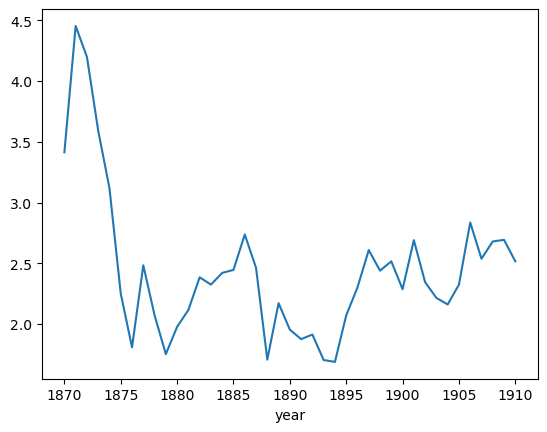

In [414]:
(nart.content/gb.maj).plot()

In [413]:
nart

,content
year,
1870,18315
1871,12707
1872,18028
1873,18930
1874,16445
1875,20462
1876,16314
1877,16146
1878,16847


In [18]:
headlineRegex = '\p{Lu}(?:\.?\p{Lu}\.?)*\p{Lu}.{0,3}(?:\.?\p{Lu}\.?)*\p{Lu}{2}[^\p{Ll}]*(?=\p{Ll}{4,})'
headlineCompiled = re.compile(headlineRegex)

In [11]:

textDf = pd.DataFrame(text)
textDf['date'] = textDf.date.apply(lambda x : x[0]) 
textDf['year'] = textDf.date.apply(lambda x : x.split('-')[0]) 
textDf['nPages'] = textDf.contentAsText.apply(len)
textDf = textDf[['contentAsText','date','nPages']].rename(columns = {'contentAsText':'pages'})

In [19]:
healdines = textDf.iloc[:20].pages.explode().apply(headlineCompiled.findall)

In [27]:
rom = healdines.explode()

In [17]:
re.findall('\p{L}+','ahsdhfjkj 26525 asdhbnsj65ajsdhbnj 333LLALALA 56 ok. ca djfnb')

['ahsdhfjkj', 'asdhbnsj', 'ajsdhbnj', 'LLALALA', 'ok', 'ca', 'djfnb']

In [32]:
rom.apply(lambda hl : ' '.join(re.compile('[LXIVCDM]{2,}').findall(hl))).explode().value_counts().head(50)

              1630
LI              95
LL              62
CI              58
DI              56
MI              55
VI              47
IC              33
CL              31
VILL            26
ILL             24
MM              24
IL              20
IVI             20
XC              15
DIC             14
LD              14
IV              14
IM              12
IX              11
ID              10
II              10
VI DIV           9
VIC              9
MILL             8
DIM              8
CC               8
LI IC            7
LM               6
LD MI            6
DI ILL           5
MM ICI           5
CI LI            5
IMM              5
LM VILL          4
DD               4
VI MM CI         4
VIII             4
MD               4
IM IM            3
LL LL            3
MIDI             3
CM               3
DX               3
ICI              3
VI DI            3
DI CCLIM         3
VI CI            3
IVIL LI LI       3
XIII             3
Name: pages, dtype: int64